# EDA and data cleaning

#### In this notebook, data will be explored, analyzed and cleaned if necessary.

In [1]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Read in the data

crypto = pd.read_csv('../data/sub-crypto.csv')
eco = pd.read_csv('../data/sub-economics.csv')

print(f'Crypto df shape is: {crypto.shape}')
print(f'Economics df shape is:{eco.shape}')

Crypto df shape is: (10000, 2)
Economics df shape is:(10000, 2)


In [5]:
crypto.head()

,subreddit,title
0,CryptoMarkets,Polychain and Celo Validator Community Bootstr...
1,CryptoMarkets,What's the Economics Of Public Goods ? :O
2,CryptoMarkets,Invesco pulls Bitcoin ETF application and othe...
3,CryptoMarkets,New York State Watchdog Orders Two Crypto Firm...
4,CryptoMarkets,New milestone: ProShares Bitcoin ETF goes publ...


In [6]:
eco.head()

,subreddit,title
0,Economics,Taiwan's exports hit new Q1 high
1,Economics,Blockchain Technology and Google Docs? They’re...
2,Economics,How America’s Great Economic Challenge Suddenl...
3,Economics,Massive Bitcoin Mining Could Disrupt China's G...
4,Economics,China will shoot....


### Searching and eliminating nulls

In [7]:
crypto.isna().sum()

subreddit    0
title        0
dtype: int64

In [9]:
eco.isna().sum()

subreddit    0
title        0
dtype: int64

### Create column with the length of each text

In [3]:
crypto['length'] = crypto['title'].apply(len)

eco['length'] = eco['title'].apply(len)

# Displaying crypto dataframe created
crypto.head()

,subreddit,title,length
0,CryptoMarkets,Polychain and Celo Validator Community Bootstr...,73
1,CryptoMarkets,What's the Economics Of Public Goods ? :O,41
2,CryptoMarkets,Invesco pulls Bitcoin ETF application and othe...,64
3,CryptoMarkets,New York State Watchdog Orders Two Crypto Firm...,296
4,CryptoMarkets,New milestone: ProShares Bitcoin ETF goes publ...,88


### Create a column with word_count of each 'title'

In [4]:
crypto['word_count'] = crypto['title'].apply(lambda x: len(x.split()))

eco['word_count'] = eco['title'].apply(lambda x: len(x.split()))

# Displaying crypto dataframe
crypto.head()

,subreddit,title,length,word_count
0,CryptoMarkets,Polychain and Celo Validator Community Bootstr...,73,10
1,CryptoMarkets,What's the Economics Of Public Goods ? :O,41,8
2,CryptoMarkets,Invesco pulls Bitcoin ETF application and othe...,64,10
3,CryptoMarkets,New York State Watchdog Orders Two Crypto Firm...,296,34
4,CryptoMarkets,New milestone: ProShares Bitcoin ETF goes publ...,88,14


### Describe the data (summary statistics)

In [13]:
crypto.describe()

,length,word_count
count,10000.000000,10000.000000
mean,88.738700,13.103900
std,82.559387,10.834447
min,1.000000,1.000000
25%,34.000000,5.000000
50%,60.000000,10.000000
75%,104.000000,18.000000
max,312.000000,67.000000


In [14]:
eco.describe()

,length,word_count
count,10000.000000,10000.000000
mean,79.000300,12.809600
std,50.430499,8.441841
min,1.000000,1.000000
25%,50.000000,8.000000
50%,67.000000,11.000000
75%,91.000000,15.000000
max,307.000000,63.000000


### Plotting the word counts for each subreddit

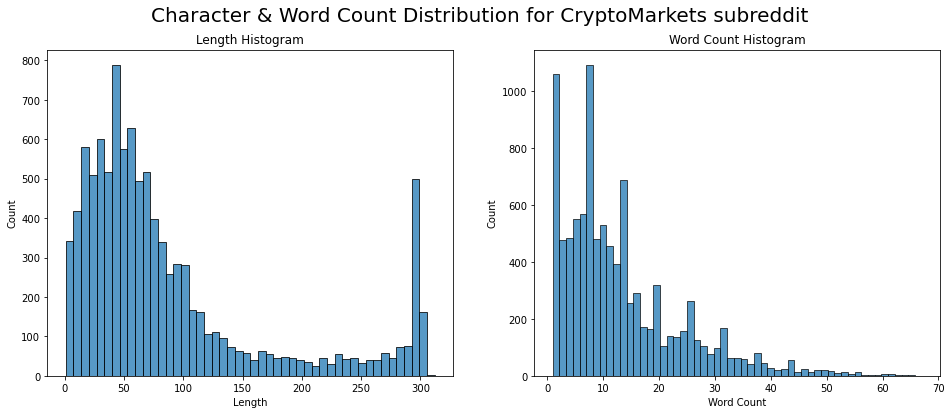

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(crypto['length'], ax=ax[0])
sns.histplot(crypto['word_count'], ax=ax[1])
ax[0].set(xlabel="Length", ylabel='Count', title='Length Histogram')
ax[1].set(xlabel="Word Count", ylabel='Count', title='Word Count Histogram')

fig.suptitle('Character & Word Count Distribution for CryptoMarkets subreddit', fontsize=20);

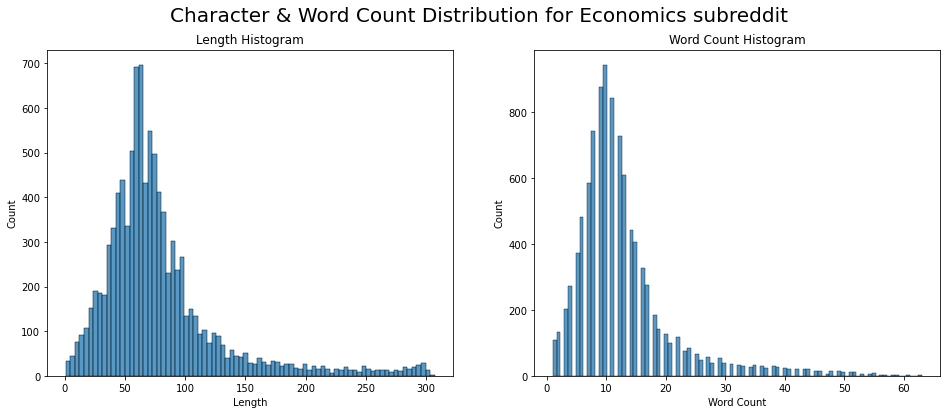

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(eco['length'], ax=ax[0])
sns.histplot(eco['word_count'], ax=ax[1])
ax[0].set(xlabel="Length", ylabel='Count', title='Length Histogram')
ax[1].set(xlabel="Word Count", ylabel='Count', title='Word Count Histogram')

fig.suptitle('Character & Word Count Distribution for Economics subreddit', fontsize=20);

### Vectorize the data for each subreddit data frame

In [5]:
#First, crypto

cv = CountVectorizer()
crypto_vect = cv.fit_transform(crypto['title'])
crypto_vect_df = pd.DataFrame(crypto_vect.todense(), columns=cv.get_feature_names())
crypto_vect_df.head()

,00,000,00000000000000,000000001,00000001busd,0000009,0000016,000001755,00001,00001207,...,𝐈𝐧𝐭𝐫𝐨𝐝𝐮𝐜𝐢𝐧𝐠,𝐑𝐞𝐜𝐫𝐮𝐢𝐭𝐦𝐞𝐧𝐭,𝐒𝐞𝐞𝐤𝐫,𝐓𝐨𝐤𝐞𝐧,𝐢𝐧,𝗔𝗡𝗡𝗢𝗨𝗡𝗖𝗘𝗠𝗘𝗡𝗧,𝗔𝗧𝗧𝗘𝗡𝗧𝗜𝗢𝗡,𝗜𝗗𝗢,𝗥𝗼𝗯𝗶𝗻𝗛𝗼𝗼𝗱𝗲𝗿𝘀,𝗪𝗢𝗡𝗗𝗘𝗥𝗛𝗘𝗥𝗢
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Then, eco

cv = CountVectorizer()
eco_vect = cv.fit_transform(eco['title'])
eco_vect_df = pd.DataFrame(eco_vect.todense(), columns=cv.get_feature_names())
eco_vect_df.head()

,00,000,001,003,005,01,02,0291,03,0311,...,𝗻𝘂𝗺𝗲𝗿𝗼𝘂𝘀,𝗿𝗲𝗴𝘂𝗹𝗮𝘁𝗼𝗿𝘀,𝗿𝗲𝗽𝗼𝗿𝘁𝘀,𝘀𝗶𝗻𝗰𝗲,𝘁𝗵𝗮𝘁,𝘁𝗵𝗲,𝘄𝗶𝘁𝗵,𝘼𝙉𝙉𝙊𝙐𝙉𝘾𝙀𝙈𝙀𝙉𝙏,𝙃𝙐𝙂𝙀,𝟮𝟬𝟭𝟴
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Plot the most frequently ocurring words by subreddit

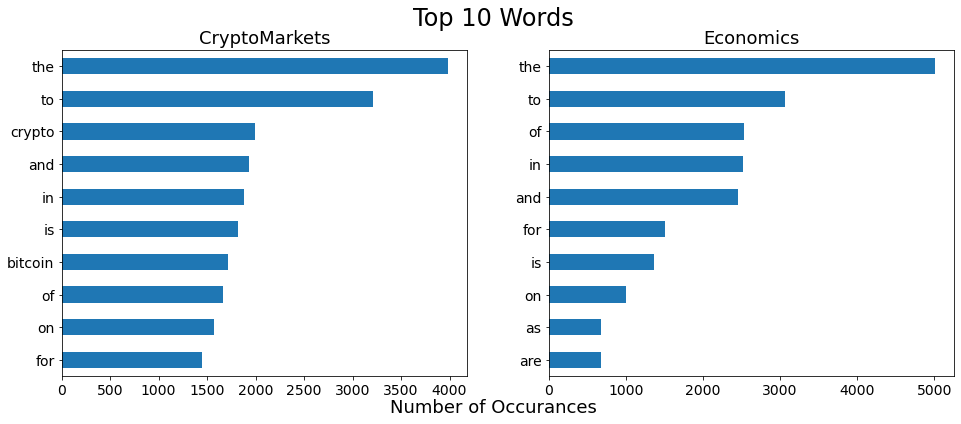

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
crypto_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], fontsize=14)
eco_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], fontsize=14)

ax[0].set_title('CryptoMarkets', fontsize=18)
ax[1].set_title('Economics', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Words', fontsize=24)
fig.text(0.5, 0.04, 'Number of Occurances', 
         ha='center', fontsize=18);

### Vectorize and plot again but using 'english' stopwords

In [23]:
cv = CountVectorizer(stop_words='english')
crypto_vect = cv.fit_transform(crypto['title'])
crypto_vect_df = pd.DataFrame(crypto_vect.todense(), columns=cv.get_feature_names())

eco_vect = cv.fit_transform(eco['title'])
eco_vect_df = pd.DataFrame(eco_vect.todense(), columns=cv.get_feature_names())

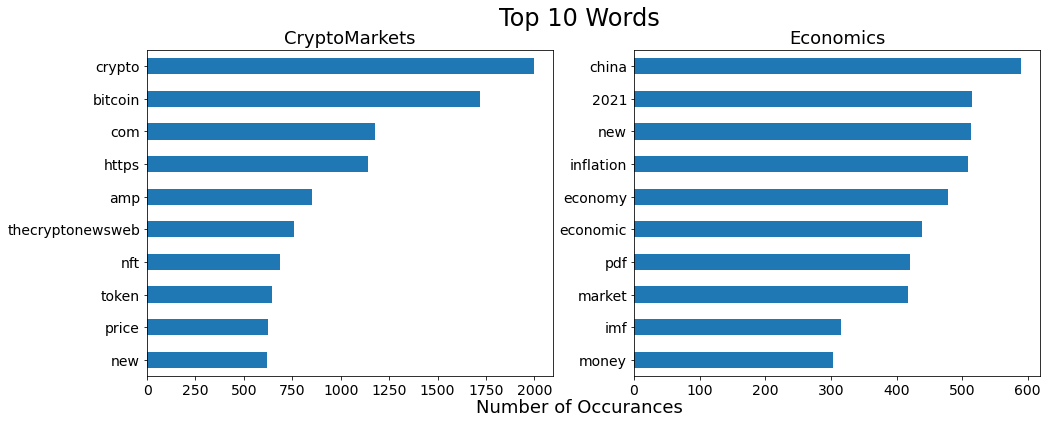

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
crypto_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], fontsize=14)
eco_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], fontsize=14)

ax[0].set_title('CryptoMarkets', fontsize=18)
ax[1].set_title('Economics', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Words', fontsize=24)
fig.text(0.5, 0.04, 'Number of Occurances', 
         ha='center', fontsize=18);

### Vectorize and plot but using 'english' stopwords and bigrams

In [7]:
cv = CountVectorizer(stop_words='english', ngram_range=(2,2))
crypto_vect = cv.fit_transform(crypto['title'])
crypto_vect_df = pd.DataFrame(crypto_vect.todense(), columns=cv.get_feature_names())

eco_vect = cv.fit_transform(eco['title'])
eco_vect_df = pd.DataFrame(eco_vect.todense(), columns=cv.get_feature_names())

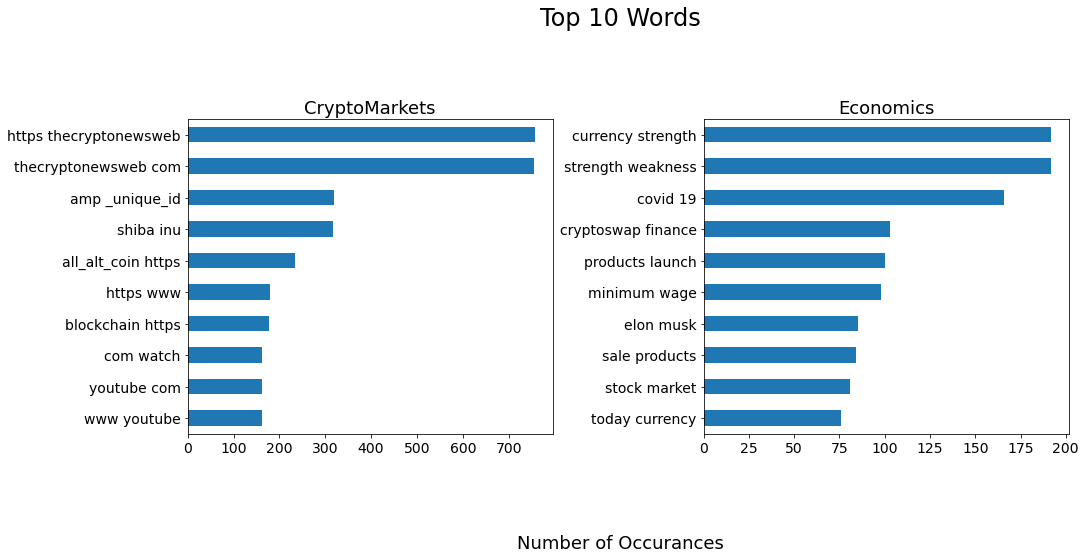

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
fig.tight_layout(pad=12.0)
crypto_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0], fontsize=14)
eco_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1], fontsize=14)

ax[0].set_title('CryptoMarkets', fontsize=18)
ax[1].set_title('Economics', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

fig.suptitle('Top 10 Words', fontsize=24)
fig.text(0.5, 0.04, 'Number of Occurances', 
         ha='center', fontsize=18);